This code takes the lists of top 5000 words per year from 1740 to 2008 for English, Spanish, German, French and Italian.<br>

The data comes from https://storage.googleapis.com/books/ngrams/books/datasetsv3.html from the version 2012 for each of the languages. <br>

For each language, the 1-grams (words) compiled by Google are divided into files "a", "b", "c", ... , "z" according to the first letter of the words. We download these 27 files (there is an extra one called "other" for words starting in another letter not from the english alphabet) for each language and placed them in a folder called "Raw_data".

In this code, for each language, we take these files, combine them and then take the top 5000 most used words for each year. 


In [1]:
import advertools as adv
import pandas as pd
import numpy as np

### Exclude all function words of all languages

We will exclude function words from the lists of words. To get the function words we take them from the advertools library. We combine all function words of all languages and we will exclude all of them from every language. 

In [18]:
exclusion_set = np.concatenate([np.array(sorted(adv.stopwords["english"])),
                          np.array(sorted(adv.stopwords["spanish"])),
                         np.array(sorted(adv.stopwords["german"])),
                         np.array(sorted(adv.stopwords["french"])),
                         np.array(sorted(adv.stopwords["italian"]))])
exclusion_set

array(['a', 'about', 'above', ..., 'vostre', 'vostri', 'vostro'],
      dtype='<U16')


The following function "filter_words" takes each of the files "a", "b", ... "z" of a given language and keeps only the top 5000 non-function words of the file used each year. Then, we will join the results of each language to one big dataframe, and keep only the top 5000 words per year of said dataframe. 

In [19]:
def filter_words_exclude_all(file,language):
    #Read the file
    df = pd.read_csv(file, header=None,sep="\t").drop(3,axis=1)
    
    # Take away the text _NOUN, _VERB, _ADJ that google has on some of the words
    df.iloc[:, 0] = df.iloc[:, 0].astype(str).str.replace(r'_VERB$|_ADJ$|_ADP$|_ADV$|_CONJ$|_DET$|_NOUN$|_NUM$|_PRON$|_PRT$', '', regex=True)
    
    # Keep only the words that have only letter characters and no numbers or special characters
    df = df[df[0].astype(str).str.isalpha()]
    
    # Make everything lowercase, so as to not have separate words depending on upper case or lower case.
    df[0] = df[0].apply(lambda x: str(x).lower())
        
    
    #Take away the words from the exclusion set
    df = df[~df[0].isin(exclusion_set)]
    
    #Take away words with only one letter.
    df = df[df[0].astype(str).apply(len) > 1]
    
    #Take away years before 1740
    df = df[df[1] >= 1740]
    
    #After having taken the lowercase, some words may be repeated. 
    #So when we have two rows with the same word and year, we put them in only one row, with the total 
    #number of appearences as the sum of both rows.
    df = df.groupby([0,1],as_index=False).sum()
    
    #Take the top 5000 words of each year. 
    df =df.groupby([1]).apply(lambda x: x.nlargest(5000, 2)).reset_index(drop=True)

    
    return(df)


In [20]:
import os
import tqdm

#Directory where the german files are saved
directory = '../Raw_data/german'
language = "german" 

dfs = []


for filename in tqdm.tqdm(os.listdir(directory)):
    file = os.path.join(directory, filename) 

    if os.path.isfile(file) == False:
        continue

    #Filter each of the files
    df = filter_words_exclude_all(file,language)
    dfs.append(df)
        
#Concatenate the filtered files
german_df = pd.concat(dfs,ignore_index = True )


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [37:20<00:00, 82.98s/it]


In [23]:
german_df

,0,1,2
0,art,1740,410
1,augen,1740,286
2,arbeit,1740,244
3,allezeit,1740,160
4,angriff,1740,158
...,...,...,...
29531088,zeitwende,2009,302
29531089,zerstrittenheit,2009,302
29531090,zitzelsberger,2009,302
29531091,zschopau,2009,302


In [24]:
german_df = german_df.groupby([0,1],as_index=False).sum()

In [25]:
german_df

,0,1,2
0,aa,1740,15
1,aa,1741,4
2,aa,1742,7
3,aa,1743,28
4,aa,1744,8
...,...,...,...
29531088,это,1969,774
29531089,это,1972,578
29531090,это,1980,784
29531091,это,1984,782


In [26]:
#Take the top 5000 words per year
final_german_df = german_df.groupby([1]).apply(lambda x: x.nlargest(5000, 2)).reset_index(drop=True)
final_german_df

,0,1,2
0,mutter,1740,2858
1,bey,1740,1815
2,kind,1740,1270
3,seyn,1740,1102
4,kan,1740,955
...,...,...,...
1349995,live,2009,35200
1349996,jahrhunderte,2009,35199
1349997,bundesrat,2009,35198
1349998,stabilisierung,2009,35192


In [27]:
#Save to a csv. 
final_german_df.to_csv("Top5000/top_german_exc_all.csv",index=False,header=False)

We save the results for each language in the folder "Top5000".

# Reading the results

Here we read the files of the top 5000 words for each language so that we can study them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
top_english_exc_all = pd.read_csv("Top5000/top_english_exc_all.csv",dtype={"0":str, "1":np.int32, "2":np.int32},
                      names = ["word","year","count"], header=None,index_col=False)
top_spanish_exc_all = pd.read_csv("Top5000/top_spanish_exc_all.csv",dtype={"0":str, "1":np.int32, "2":np.int32},
                      names = ["word","year","count"], header=None,index_col=False)
top_italian_exc_all = pd.read_csv("Top5000/top_italian_exc_all.csv",dtype={"0":str, "1":np.int32, "2":np.int32},
                     names = ["word","year","count"], header=None,index_col=False)
top_german_exc_all= pd.read_csv("Top5000/top_german_exc_all.csv",dtype={"0":str, "1":np.int32, "2":np.int32},
                  names = ["word","year","count"], header=None,index_col=False)
top_french_exc_all= pd.read_csv("Top5000/top_french_exc_all.csv",dtype={"0":str, "1":np.int32, "2":np.int32},
                         names = ["word","year","count"], header=None,index_col=False)



In [3]:
top_spanish_exc_all[top_spanish_exc_all["word"]=="cine"]

,word,year,count
1039380,cine,1947,12234
1044662,cine,1948,11622
1048722,cine,1949,15010
1059144,cine,1951,12586
1063858,cine,1952,15250
...,...,...,...
1325724,cine,2005,316862
1330894,cine,2006,263421
1335779,cine,2007,248892
1340872,cine,2008,170847


In [15]:
german_mutter = top_german_exc_all[top_german_exc_all["word"]=="mutter"]
german_mutter

,word,year,count
0,mutter,1740,2858
5319,mutter,1741,110
10259,mutter,1742,138
15613,mutter,1743,180
20350,mutter,1744,112
...,...,...,...
1325203,mutter,2005,327720
1330207,mutter,2006,346934
1335208,mutter,2007,398902
1340139,mutter,2008,475064


Text(0, 0.5, 'Count')

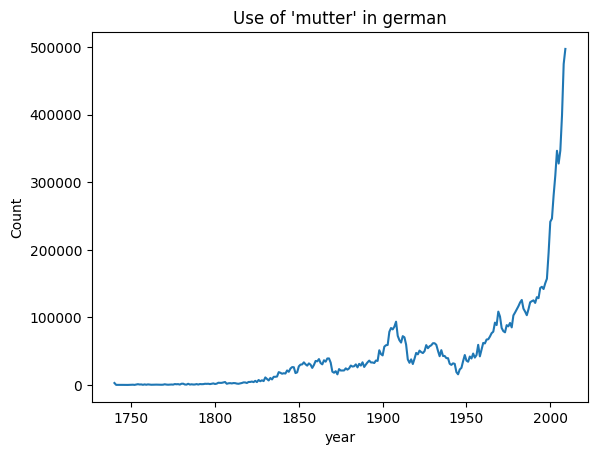

In [16]:
plt.plot(german_mutter["year"],
         german_mutter["count"])
plt.title("Use of 'mutter' in german")
plt.xlabel("year")
plt.ylabel("Count")

In [17]:
top_italian_exc_all[top_italian_exc_all["word"]=="roosevelt"]

,word,year,count
1007049,roosevelt,1941,6666
1014264,roosevelt,1942,3246
1019371,roosevelt,1943,3250
